# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [59]:
# No mostrar advertencias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

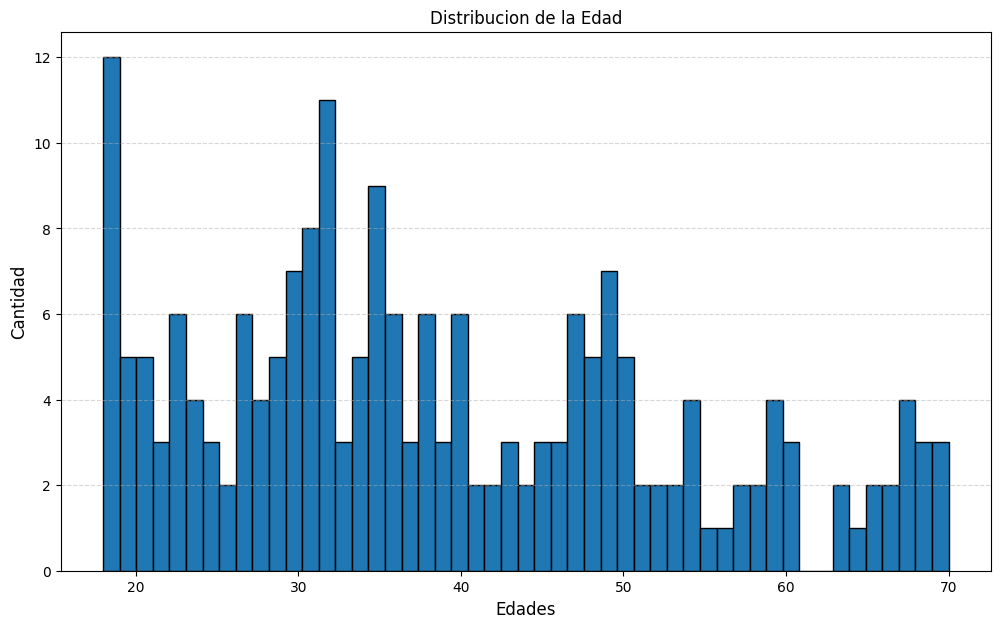

In [3]:
# tu código aquí
df = pd.read_csv('./data/retailmax.csv')

plt.figure(figsize=(12,7))

plt.hist(df['Age'], bins=51, edgecolor='black')
plt.title("Distribucion de la Edad")
plt.xlabel("Edades", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [4]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
a = list(df['Age'].value_counts())
len(a)

51

### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

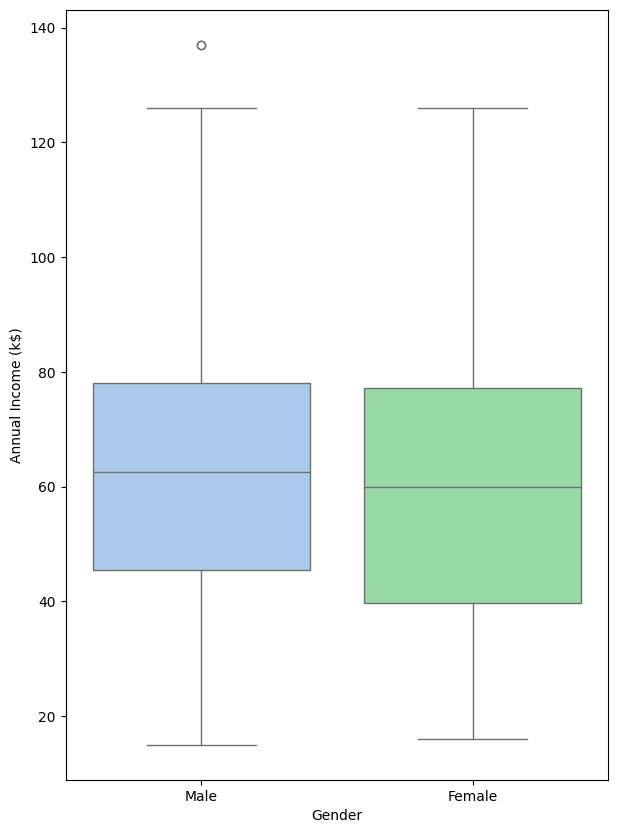

In [6]:
# tu código aquí
plt.figure(figsize=(7,10))
sns.boxplot(data=df, x='Gender', y='Annual Income (k$)', palette="pastel6")
plt.show()

### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

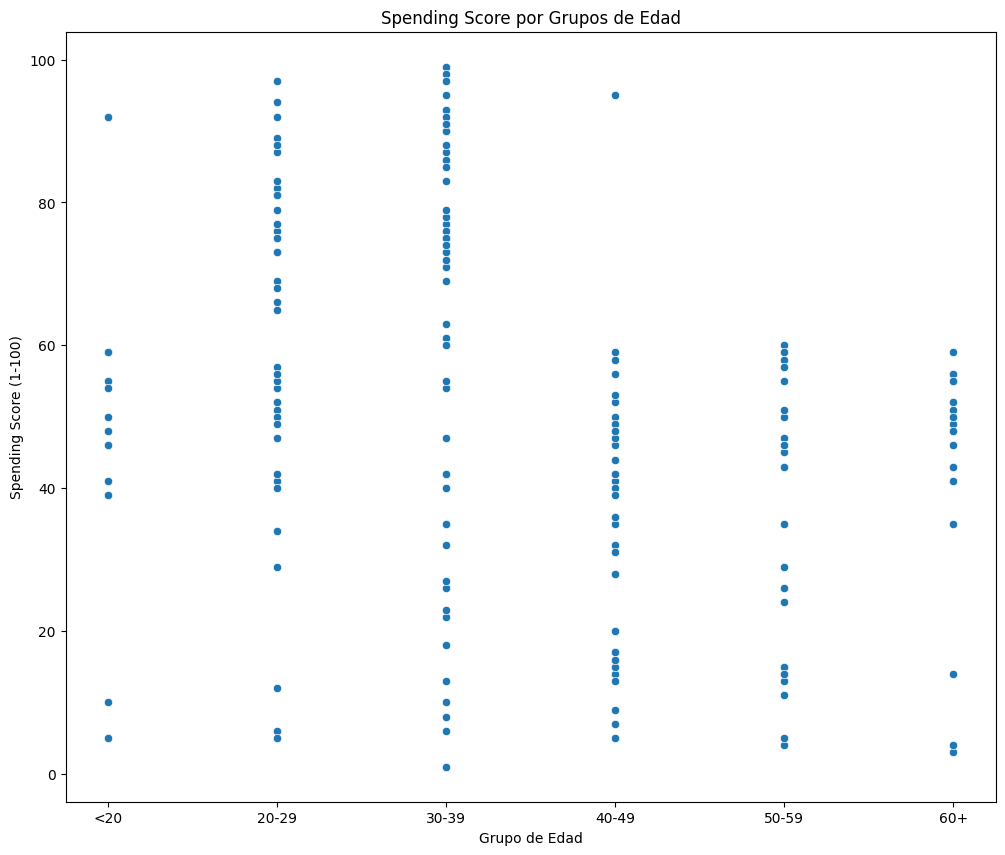

In [7]:
# tu código aquí
plt.figure(figsize=(12,10))

bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

sns.scatterplot(data=df, x='AgeGroup', y='Spending Score (1-100)', palette='flare')
plt.title('Spending Score por Grupos de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'AgeGroup'],
      dtype='object')

### 4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?
- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

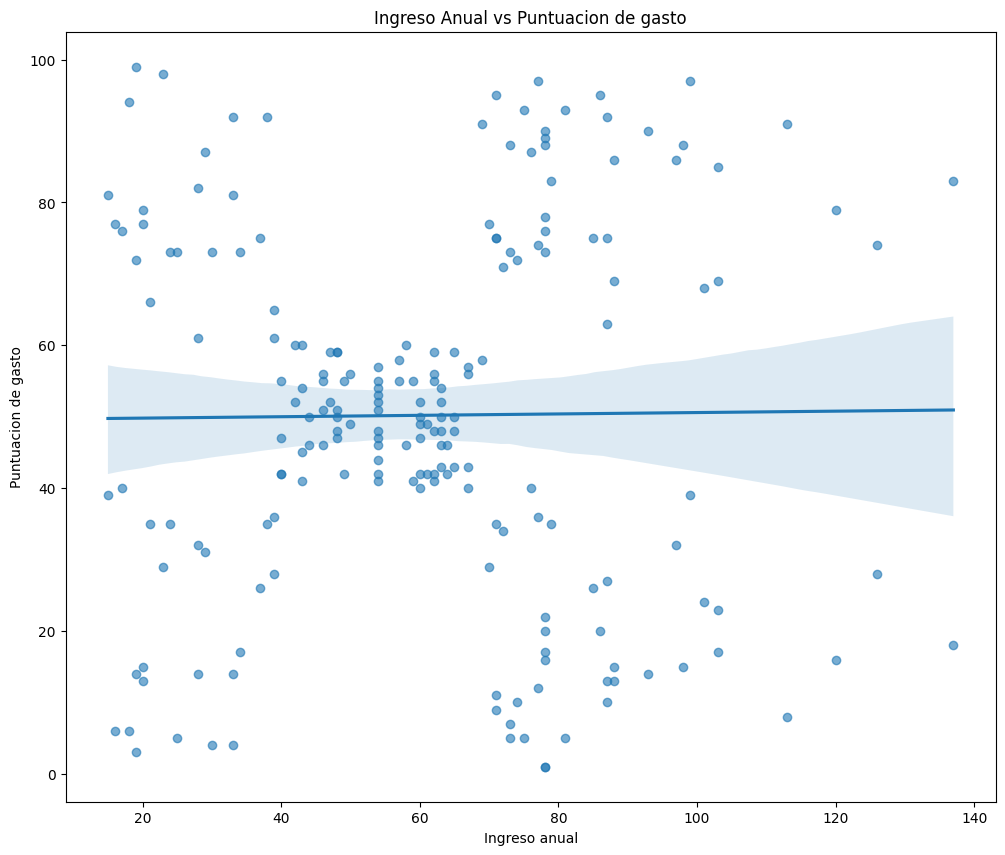

Coeficiente de correlacion: 0.009902848094037608


In [53]:
# tu código aquí
plt.figure(figsize=(12,10))

sns.regplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', scatter_kws={'alpha':0.6})
plt.title('Ingreso Anual vs Puntuacion de gasto')
plt.xlabel('Ingreso anual')
plt.ylabel('Puntuacion de gasto')
plt.show()

correlacion = df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])
print("Coeficiente de correlacion:", correlacion)

### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

In [28]:
df['IncomeGroup'] = pd.qcut(df['Annual Income (k$)'], q=4, labels=['Bajo', 'Medio', 'Alto', 'Muy alto'])

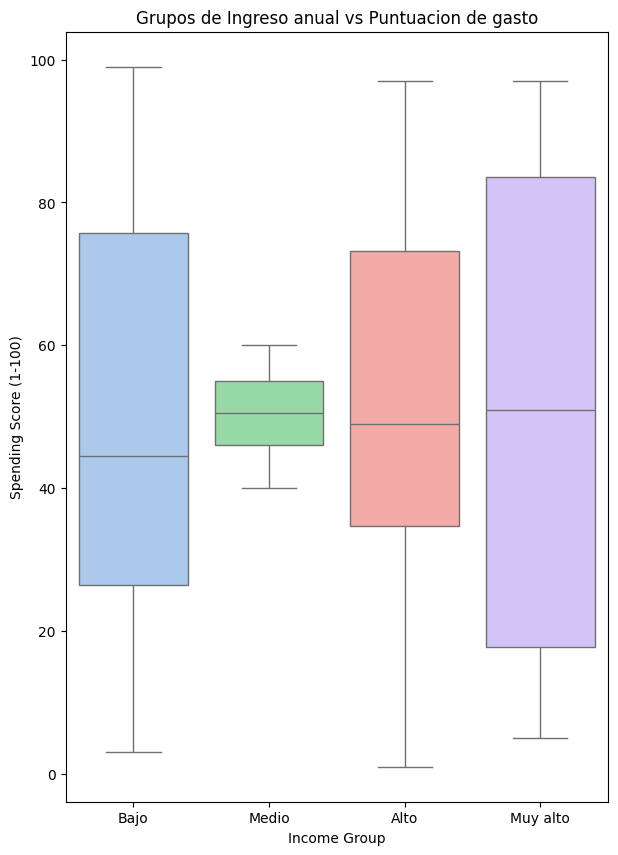

In [49]:
# tu código aquí
plt.figure(figsize=(7,10))
sns.boxplot(data=df, x='IncomeGroup', y='Spending Score (1-100)', palette="pastel6")
plt.title("Grupos de Ingreso anual vs Puntuacion de gasto")
plt.xlabel("Income Group")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [17]:
print(df['Annual Income (k$)'].describe())

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64


### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

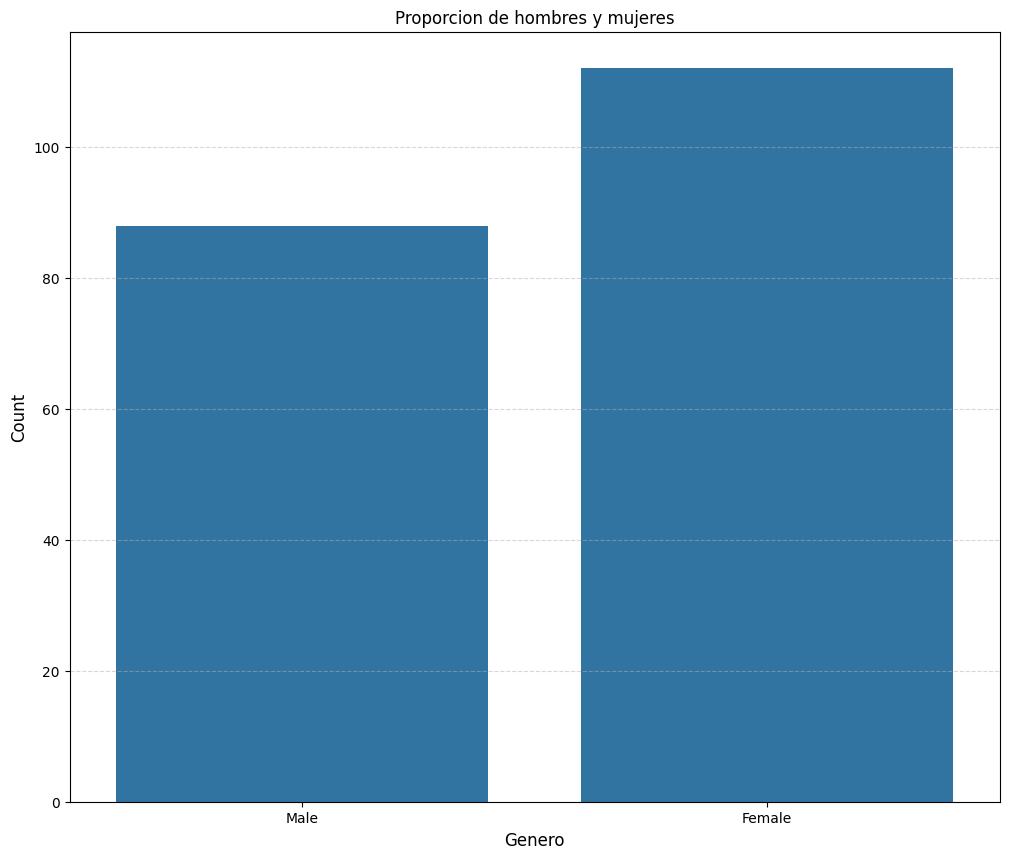

In [31]:
# tu código aquí
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='Gender')
plt.title("Proporcion de hombres y mujeres")
plt.xlabel("Genero", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

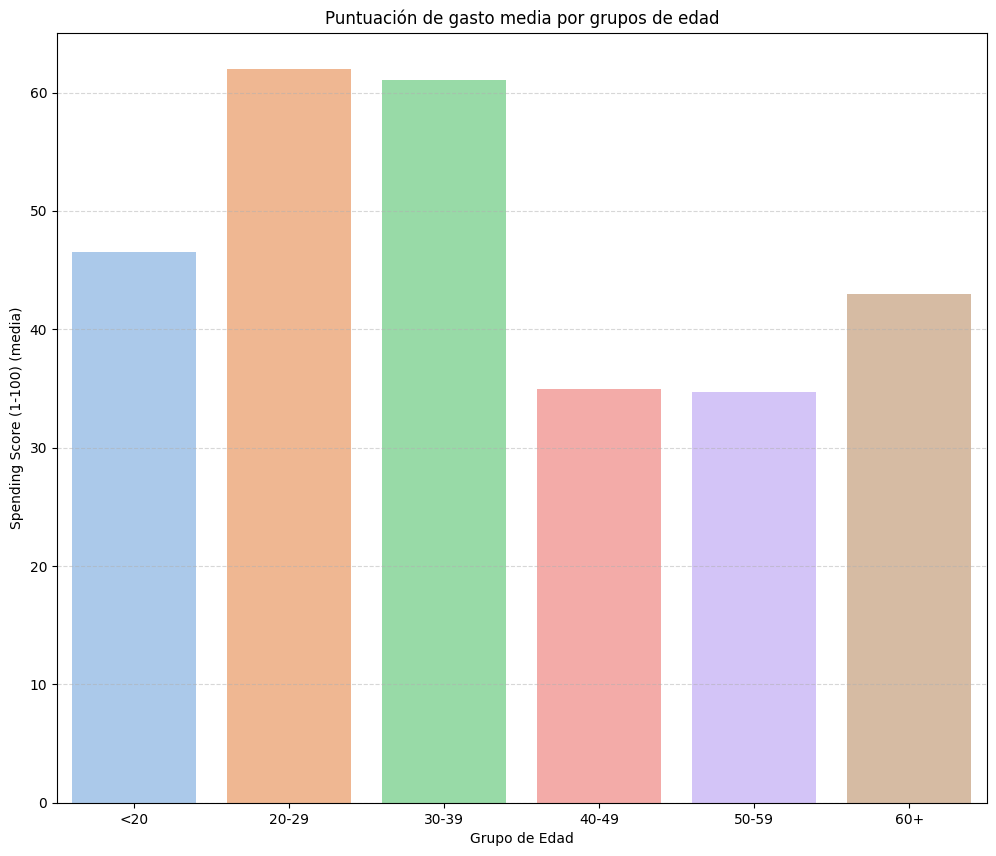

In [46]:
# tu código aquí
plt.figure(figsize=(12,10))

bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

sns.barplot(data=df, x='AgeGroup', y='Spending Score (1-100)', ci=None, palette='pastel')
plt.title('Puntuación de gasto media por grupos de edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Spending Score (1-100) (media)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

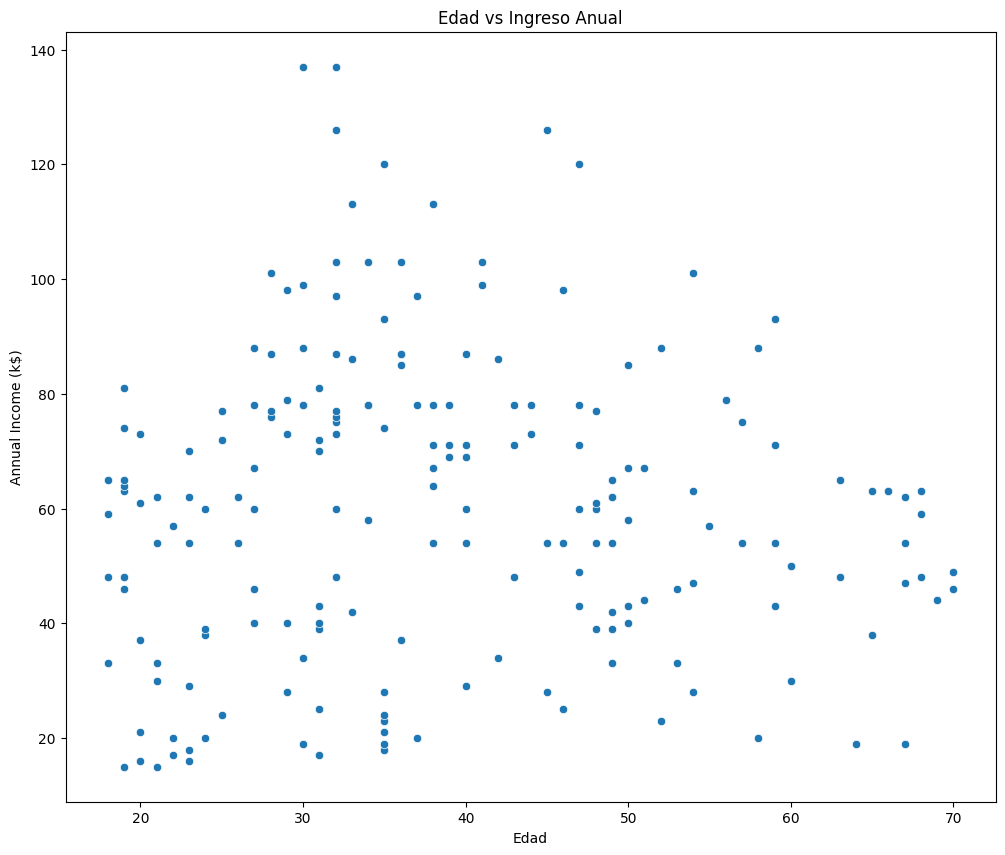

Coeficiente de correlacion: -0.012398042736060145


In [67]:
# tu código aquí
plt.figure(figsize=(12,10))

sns.scatterplot(data=df, x='Age', y='Annual Income (k$)')
plt.title('Edad vs Ingreso Anual')
plt.xlabel('Edad')
plt.ylabel('Annual Income (k$)')
plt.show()

# Correlacion solo por curiosidad
correlacion = df['Annual Income (k$)'].corr(df['Age'])
print("Coeficiente de correlacion:", correlacion)

### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

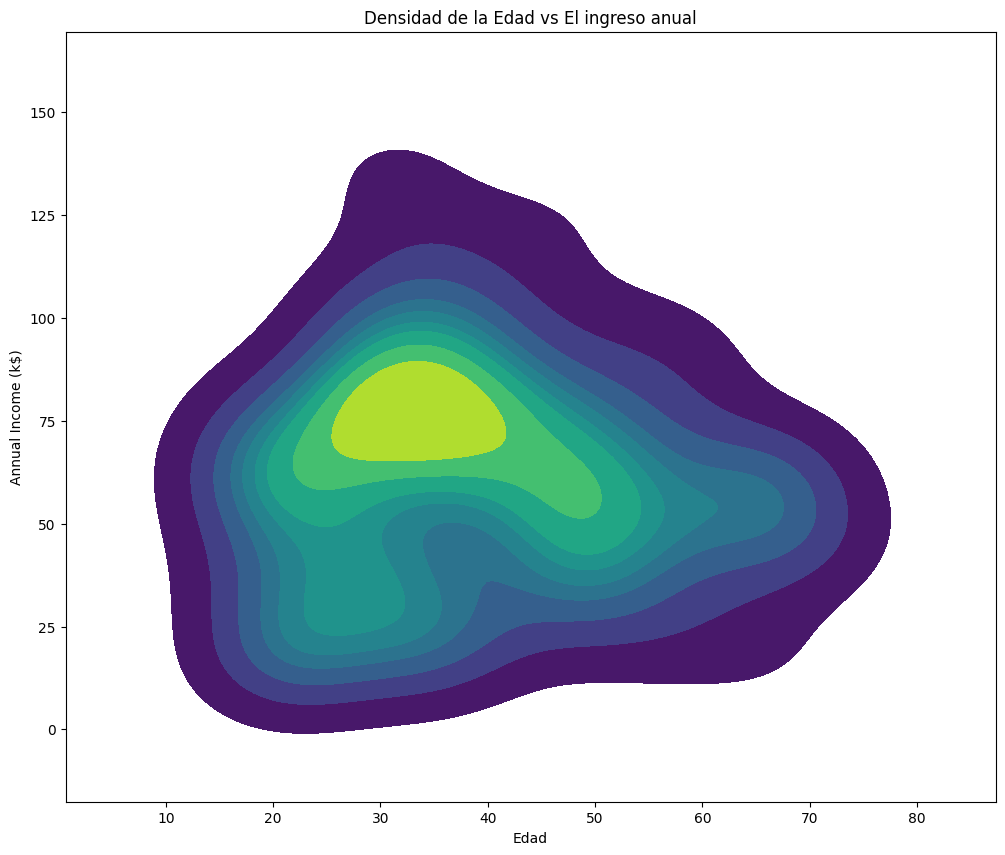

In [65]:
# tu código aquí
plt.figure(figsize=(12, 10))
sns.kdeplot(
    data=df,
    x='Age',
    y='Annual Income (k$)',
    fill=True,  # Dar color a la densidad
    cmap='viridis',
    thresh=0.05     # Esconder areas con muy poca densidad
)
plt.title("Densidad de la Edad vs El ingreso anual")
plt.xlabel("Edad")
plt.ylabel("Annual Income (k$)")
plt.show()

### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

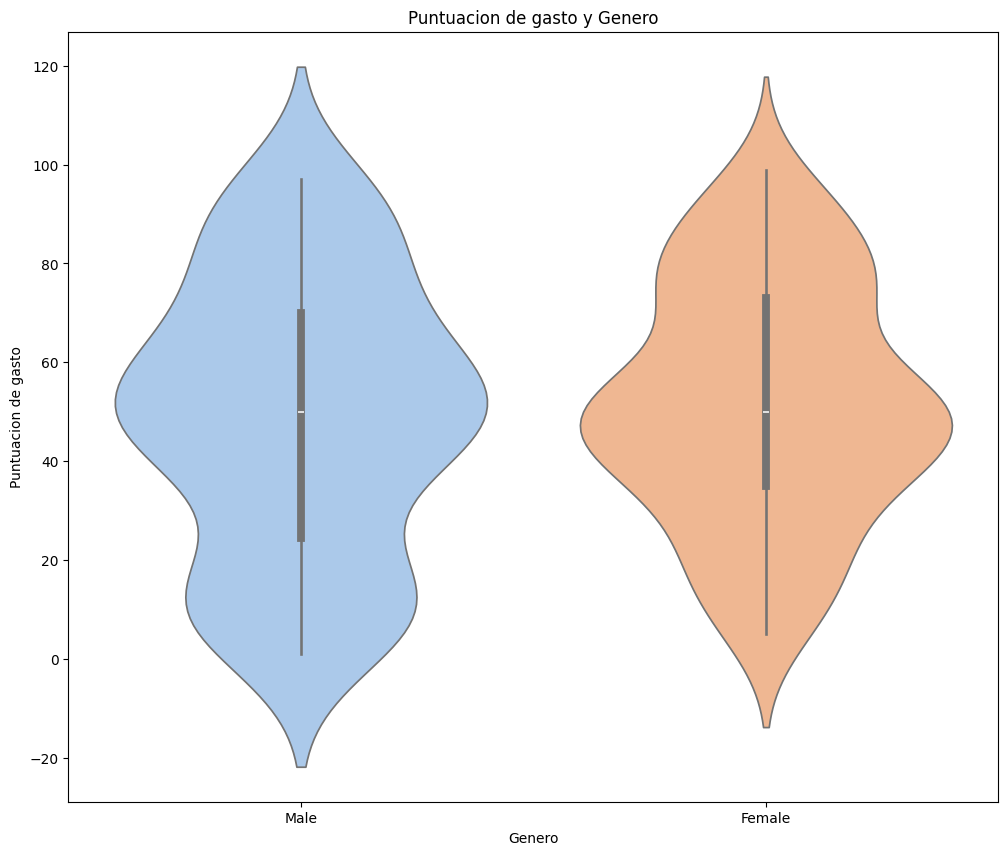

In [77]:
# tu código aquí
plt.figure(figsize=(12,10))

sns.violinplot(data=df, x='Gender', y='Spending Score (1-100)', palette='pastel')
plt.title('Puntuacion de gasto y Genero')
plt.xlabel('Genero')
plt.ylabel('Puntuacion de gasto')
plt.show()